In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

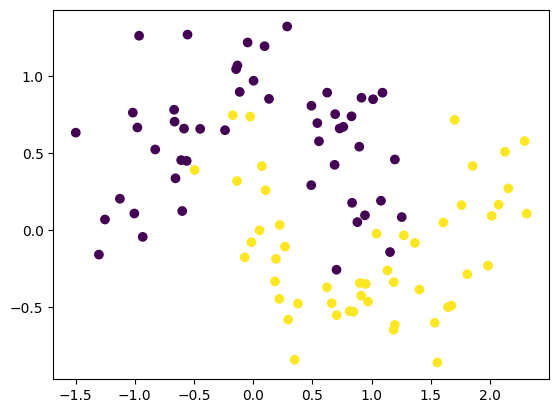

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

c:\Users\irbag\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 487us/step


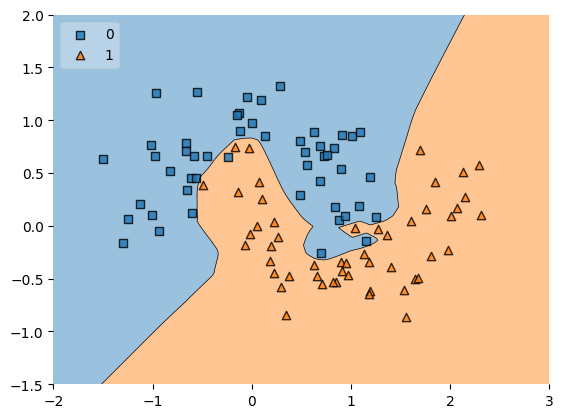

In [6]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

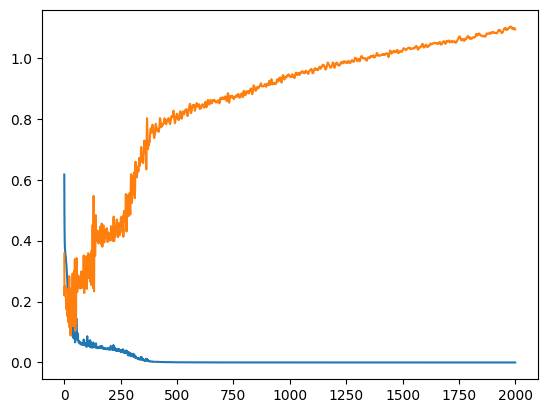

In [7]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [8]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 435us/step


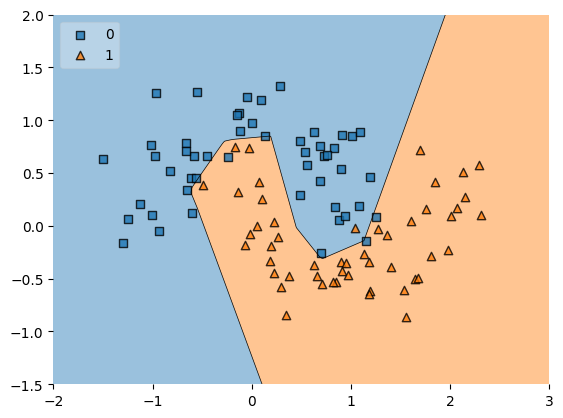

In [10]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

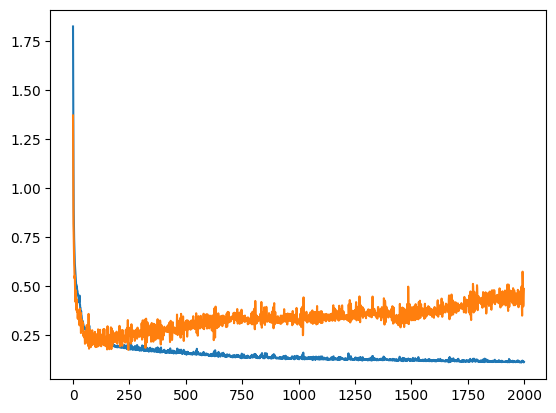

In [11]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [12]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

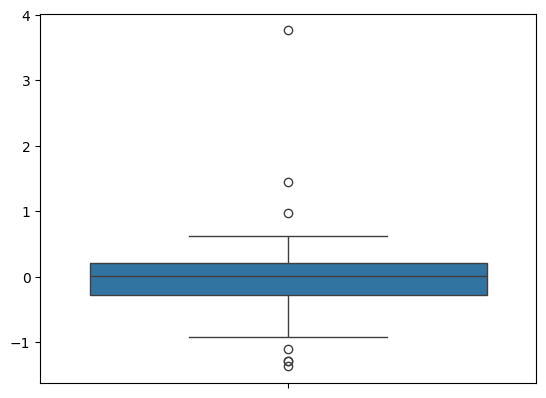

In [13]:
sns.boxplot(model1_weight_layer1)

<Axes: >

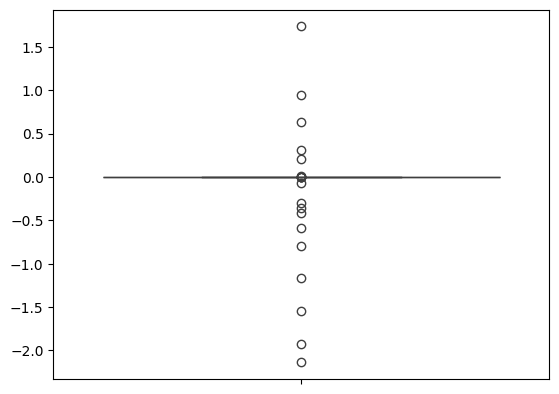

In [14]:
sns.boxplot(model2_weight_layer1)

In [15]:
model1_weight_layer1.min()

-1.3693794

In [16]:
model2_weight_layer1.min()

-2.1367466

C:\Users\irbag\AppData\Local\Temp\ipykernel_198688\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\irbag\AppData\Local\Temp\ipykernel_198688\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

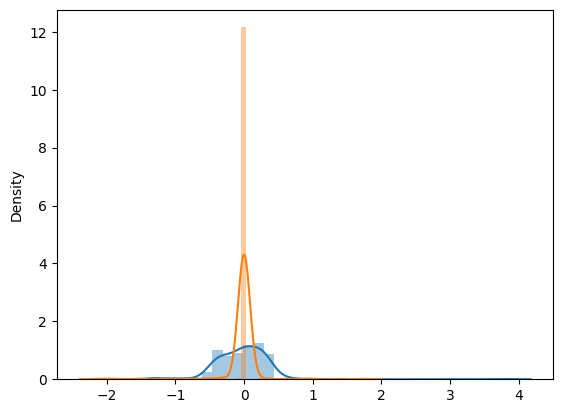

In [17]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [18]:
model1.get_weights()[0].reshape(256)

array([ 4.36022729e-02, -1.48098186e-01,  3.47003043e-01, -4.45939600e-01,
       -2.51724478e-02,  3.37853074e-01,  5.86060435e-02,  4.06391583e-02,
       -4.82301652e-01, -3.41975540e-01, -4.67965961e-01, -5.58120668e-01,
       -2.34107912e-01,  3.06648433e-01,  2.54299521e-01, -4.65054899e-01,
       -4.38097030e-01,  1.25546470e-01, -3.95608664e-01, -3.75170350e-01,
       -1.84297666e-01, -2.39874274e-01, -4.05824363e-01,  5.23507446e-02,
        3.72654796e-01, -4.75476645e-02,  3.35581303e-01, -3.84482384e-01,
        1.71643034e-01, -4.53392208e-01,  3.26742977e-01,  1.59627095e-01,
       -4.95421380e-01,  3.33635032e-01, -1.99206308e-01, -6.02129065e-02,
       -3.97254854e-01, -4.50755626e-01,  3.58384788e-01, -3.01615298e-01,
       -1.49426863e-01, -3.88146430e-01, -2.79863775e-01,  3.12241822e-01,
        2.92831808e-01, -2.15557024e-01, -2.98381209e-01, -2.18098149e-01,
        2.79338732e-02,  3.45106035e-01,  2.25554362e-01, -4.28121775e-01,
       -1.09019671e-02, -